## 背景知识

**给你一个数组，如何快速查询数组中某一区间的和？**

如果数组里面的内容是不变的，那么可以使用**前缀和**来解决，构造前缀和的时间复杂度为 $O(n)$，查询区间的时间复杂度为 $O(1)$。

**但如果数组里面的内容会更新**，提前计算好的前缀和就失效了，查询的时间复杂度退化为 $O(n)$。那么有没有一种数据结构能够兼顾查询和更新的效率呢？当然有，那就是**线段树**！

这篇帖子写的很好，介绍了`前缀和`及`线段树`的区别：https://leetcode.cn/circle/discuss/7voSQX/

## 什么是线段树?

线段树（Segment Tree）是一种二叉树形数据结构，1977 年由 Jon Louis Bentley 发明，用以存储区间或线段，并且允许快速查询结构内包含某一点的所有区间。

线段树将数据保存在叶子节点，在上层节点中保存对应区间的相关信息。
线段树的根节点对应数组的整个区间，然后递归的将节点所在的区间平衡的划分成左右两部分，并创建左右两颗子树，直到区间中只包含一个元素。

<img alt="线段树示意图" src="https://pic.leetcode.cn/1694272404-cQImBo-%E7%BA%BF%E6%AE%B5%E6%A0%91%E7%A4%BA%E6%84%8F%E5%9B%BE.jpg" width="700px">

*图：一个区间求和线段树👆*

## 练习题目

[307. 区域和检索 - 数组可修改](https://leetcode-cn.com/problems/range-sum-query-mutable/)

[2424. 最长上传前缀](https://leetcode.cn/problems/longest-uploaded-prefix/description/)

[线段树专题](https://leetcode.cn/tag/segment-tree/discuss/latest/)


### 运行环境

*笔记中的动画使用 [algviz算法动画引擎](https://algviz.com/) 渲染，环境配置请参考该链接：[https://algviz.com/cn/installation.html](https://algviz.com/cn/installation.html)*

*觉得对你有帮忙的话请给👉[algviz开源项目](https://github.com/zjl9959/algviz)👈点个 Star✨，遇到了问题也可以在这里 [报个bug](https://github.com/zjl9959/algviz/issues)！*

In [1]:
# 导入算法可视化库，进行实时动画预览；
# 开源项目链接：https://github.com/zjl9959/algviz
import algviz

# 定义线段树节点，记录节点对应的区间信息；
# 线段树也是二叉树，这里直接继承 algviz 提供的二叉树类。
class SegmentTreeNode(algviz.BinaryTreeNode):
    def __init__(self, l, r, v, left, right):
        super().__init__(v, left, right)
        self.l = l      # 区间左边界
        self.r = r      # 区间右边界

    def __str__(self):
        return '{}\n[{},{}]'.format(self.val, self.l, self.r)

# 更新线段树某一节点的值，这里是做区间求和，根据需要也可以换成求区间最大/最小值。
def update_value(node):
    val = 0
    if node.left is not None:
        val += node.left.val
    if node.right is not None:
        val += node.right.val
    return val

class SegmentTree:
    def __init__(self, data):
        self.data = data                    # 保存输入的数组
        self.viz = algviz.Visualizer()      # 实例化一个可视化窗口
        self.tree = self.viz.createGraph()  # 实例化一个线段树可视化对象
        self.root = self.create(0, len(self.data))
        self.tree.addNode(self.root)        # 将创建好的线段树绑定到可视化对象
        self.viz.display()                  # 刷新可视化窗口

    # 递归的创建线段树区间 [l, r)
    def create(self, l, r):
        if l == r - 1:
            node = SegmentTreeNode(l, r - 1, self.data[l], None, None)
            self.tree.addNode(node)
            self.viz.display(1.0)
            return node
        mid = (l + r) // 2                  # 将区间均分，注意是左闭右开
        node = SegmentTreeNode(l, r - 1, None, None, None)
        self.tree.addNode(node)
        self.viz.display(1.0)
        if mid > l:
          node.left = self.create(l, mid)   # 创建左子树
        if mid < r:
          node.right = self.create(mid, r)  # 创建右子树
        node.val = update_value(node)       # 左右子树创建完成后，更新节点的值
        self.viz.display(1.0)
        return node
    
    # 区间查询接口 [l, r]
    def query(self, l, r):
        res = self._query(self.root, l, r)
        self.viz.display()
        self.tree.removeMark(algviz.cRed)   # 移除树节点上的颜色节点标记
        self.viz.display()
        self.tree.removeMark(algviz.cGreen)
        self.viz.display()
        return res

    # 区间查询接口的内部递归实现
    def _query(self, node, l, r):
        if l == node.l and r == node.r:     # 要查询的区间和树节点匹配上了！
            self.tree.markNode(algviz.cGreen, node, True)
            self.viz.display()              # 刷新可视化动画
            return node.val
        self.tree.markNode(algviz.cRed, node, True)
        self.viz.display()
        mid = (node.l + node.r) // 2
        if r <= mid:
            return self._query(node.left, l, r)     # 要查询的区间位于左子树
        elif l > mid:
            return self._query(node.right, l, r)    # 要查询的区间位于右子树
        else:
            # 当要查询区间跨了两个节点时，分成两个区间进行查询
            return self._query(node.left, l, mid) + self._query(node.right, mid + 1, r)
    
    # 单点更新接口
    def update(self, pos, val):
        self._update(self.root, pos, val)
        self.tree.removeMark(algviz.cBlue)
        self.viz.display()
    
    # 单点更新接口的内部实现
    def _update(self, node, pos, val):
        self.tree.markNode(algviz.cBlue, node, True)
        self.viz.display()
        if pos == node.l and pos == node.r:
            node.val = val
            self.viz.display()
            return
        mid = (node.l + node.r) // 2
        if pos <= mid:
            self._update(node.left, pos, val)
        else:
            self._update(node.right, pos, val)
        node.val = update_value(node)       # 更新查询路径上节点的值
        self.viz.display()

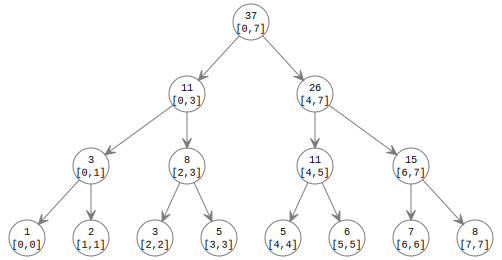

In [2]:
# 创建一个线段树
st = SegmentTree([1, 2, 3, 4, 5, 6, 7, 8])

In [3]:
# 区间查询
st.query(1, 3)

9

In [4]:
# 节点更新
st.update(3, 5)